# 🔹 Sabriya Sowers’ Bonus Wine Data Analysis 🔹

**Author:** Sabriya Sowers  
**Date:** October 31, 2025  

## Introduction

This project uses the **Wine Dataset** available in `scikit-learn`, which contains measurements of various chemical properties for three different wine types.  
The goal is to explore the dataset, identify relationships between features, and determine which variables may help classify the wines into their respective groups.

The notebook follows the same general structure as the Titanic analysis project:  
1. Inspect and clean the data  
2. Explore feature relationships through visualizations  
3. Select input features (X) and target (y)  
4. Split the data into training and test sets  
5. Reflect on insights from the analysis

## Section 1:  Import, Setup Project Theme, and Inspect the Data


In [59]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import load_wine

In [ ]:
# Project theme setup
PRIMARY_PURPLE = "#4B0082"   # purple
ACCENT_TEAL    = "#20B2AA"   # teal
NEUTRAL_GRAY   = "#808080"   # gray

# Background with gridlines
sns.set_theme(style="whitegrid")

# Global palatte for Seaborn plots
sns.set_palette([PRIMARY_PURPLE])

# Color theme applied to plots that have multiple series,lines,bars
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=[PRIMARY_PURPLE, ACCENT_TEAL, NEUTRAL_GRAY])

# Keep text black for readability
plt.rcParams["text.color"] = "black"
plt.rcParams["axes.labelcolor"] = "black"
plt.rcParams["axes.titlecolor"] = "black"
plt.rcParams["xtick.color"] = "black"
plt.rcParams["ytick.color"] = "black"

In [61]:
# Load the Wine dataset from sklearn
wine_data = load_wine()

# Convert the dataset’s feature data (numeric values only) into a pandas DataFrame
wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Add the 'target' column to represent the wine class (0, 1, or 2)
wine['target'] = wine_data.target

# Basic information
wine.info()

# Check for missing values
wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [62]:
# Preview first rows
wine.head() #print(wine.head(10))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [63]:
# Summary statistics
wine.describe() # print(wine.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [64]:
# Alcohol content stats
print("Alcohol Stats:")
print("Min:", wine['alcohol'].min())
print("Median:", wine['alcohol'].median())
print("Max:", wine['alcohol'].max())

Alcohol Stats:
Min: 11.03
Median: 13.05
Max: 14.83


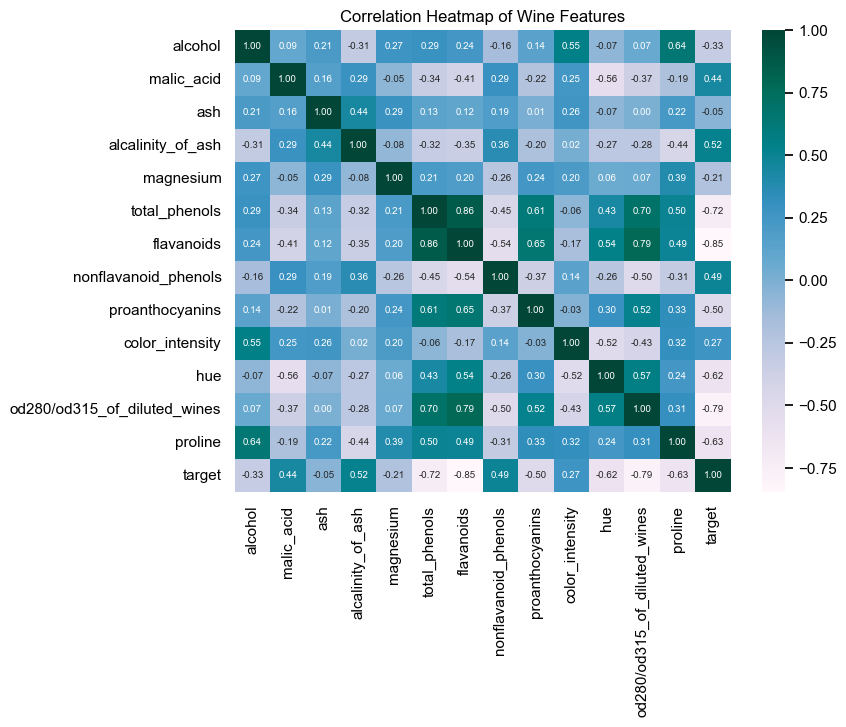

In [65]:
# Check correlations between numeric features
plt.figure(figsize=(8,6))
sns.heatmap(wine.corr(), cmap="PuBuGn", annot=True, fmt=".2f", annot_kws={"size":7})
plt.title("Correlation Heatmap of Wine Features")
plt.show()

## Section 2: Data Cleaning


In [66]:
# Check for missing values
print(wine.isnull().sum())

# Check for duplicates
print("Duplicate rows:", wine.duplicated().sum())

# Verify data types
print(wine.dtypes)

# Rename columns that have difficult to underatand names
wine = wine.rename(columns={
    "alcohol": "alcohol_pct",
    "malic_acid": "malic_acid",
    "ash": "ash",
    "alcalinity_of_ash": "ash_alcalinity",
    "magnesium": "magnesium",
    "total_phenols": "total_phenols",
    "flavanoids": "flavonoids",
    "nonflavanoid_phenols": "nonflav_phenols",
    "proanthocyanins": "proanthocyanins",
    "color_intensity": "color_intensity",
    "hue": "color_hue",
    "od280/od315_of_diluted_wines": "phenolic_ratio",
    "proline": "proline",
    "target": "wine_class"
})

wine.head()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
Duplicate rows: 0
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline      

,alcohol_pct,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavonoids,nonflav_phenols,proanthocyanins,color_intensity,color_hue,phenolic_ratio,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Reflection 1:

**1. How many data instances are there?**  
178  

**2. How many features are there?**  
14  

**3. What are the names?**  
alcohol_pct, malic_acid, ash, ash_alcalinity, magnesium, total_phenols, flavonoids, nonflav_phenols, proanthocyanins, color_intensity, color_hue, phenolic_ratio, proline, and wine_class.

**4. Are there any missing values?**  
No. All columns have complete data with no missing values.  

**5. Are there any non-numeric features?**  
No. All features are numeric (float64 or int64).  

**6. Are the data instances sorted on any of the attributes?**  
No, the dataset does not appear to be sorted by any feature.  

**7. What are the minimum, median, and maximum values for alcohol?**  
- Minimum: 11.03  
- Median: 13.05  
- Maximum: 14.83  

**8. What two different features have the highest correlation?**   
- Flavonoids and total_phenols are strongly correlated (r ≈ 0.86), suggesting potential redundancy.

**9. Are there any categorical features that might be useful for prediction?**  
No, all features are numerical.  

**Data Cleaning Notes:**  
Before visualizing, the dataset was checked for missing values, duplicates, and correct data types. No cleaning was required since the data was already complete. Columns were then renamed for readability. For example, `hue` became `color_hue`, `od280/od315_of_diluted_wines` became `phenolic_ratio`, and `target` became `wine_class`to make the visualizations and later analysis easier to interpret.


## Section 3: Data Exploration and Visualization


array([[<Axes: title={'center': 'alcohol_pct'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'ash_alcalinity'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavonoids'}>,
        <Axes: title={'center': 'nonflav_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'color_hue'}>,
        <Axes: title={'center': 'phenolic_ratio'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'wine_class'}>, <Axes: >, <Axes: >]],
      dtype=object)

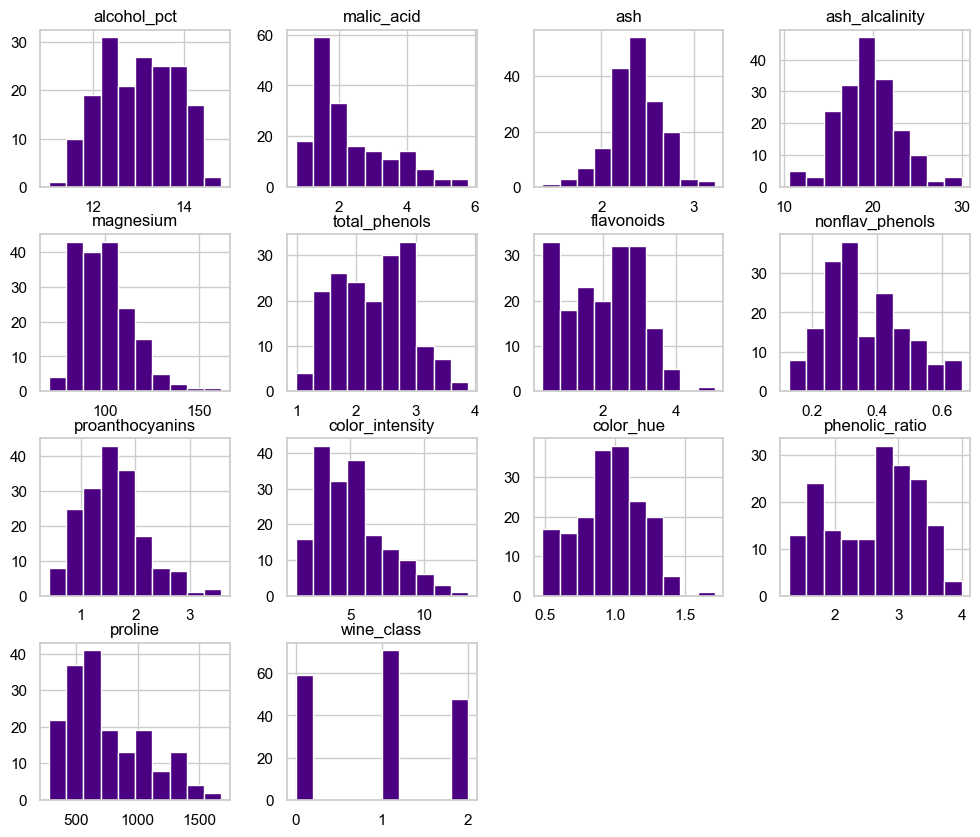

In [67]:
wine.hist(figsize=(12,10), color="#4B0082")

### Scatter Matrix: Alcohol, Color Intensity, & Proline


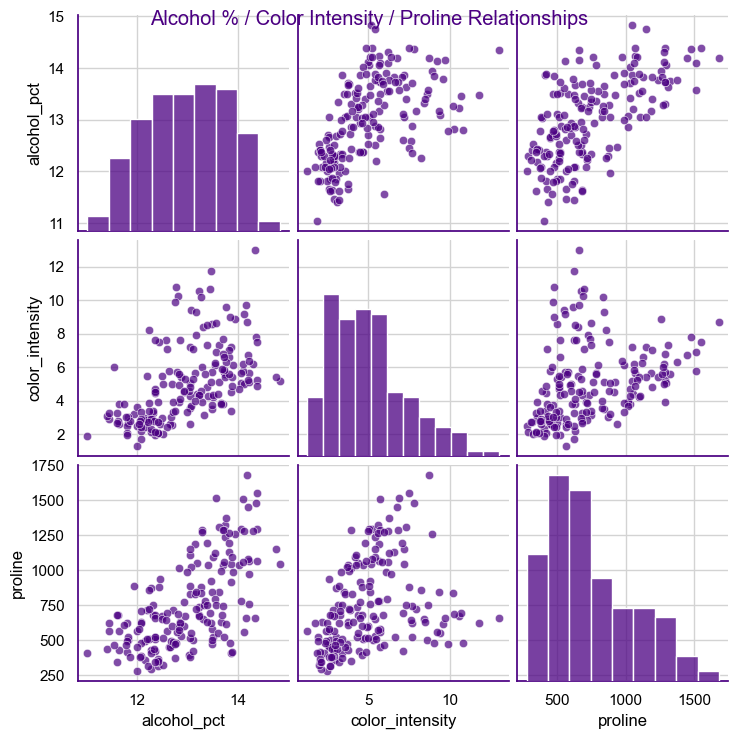

In [68]:
sns.set_theme(
    style="whitegrid",
    rc={
        "axes.edgecolor": "#4B0082",
        "grid.color": "#D3D3D3",
        "xtick.color": "black",
        "ytick.color": "black",
        "axes.labelcolor": "black",
        "axes.titlecolor": "#4B0082",
    }
)

sns.pairplot(
    wine[["alcohol_pct", "color_intensity", "proline"]],
    diag_kind="hist",
    corner=False,
    plot_kws={"color": "#4B0082", "alpha": 0.7},
    diag_kws={"color": "#4B0082"}
)

plt.suptitle("Alcohol % / Color Intensity / Proline Relationships", color="#4B0082")
plt.show()

### Alcohol vs Color Intensity by Wine Class


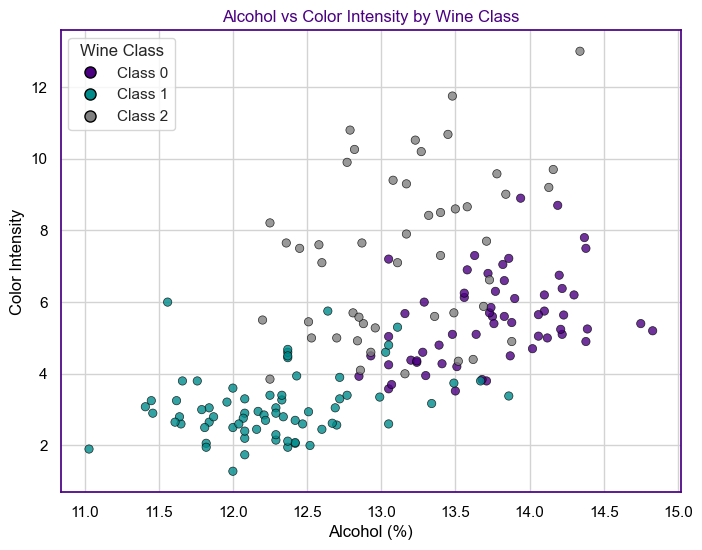

In [69]:
# Build a color map using your purple / teal / gray theme
color_map = {
    0: "#4B0082",  # purple
    1: "#008B8B",  # teal
    2: "gray"      # gray
}

# Map each row's class to its display color
point_colors = wine["wine_class"].map(color_map)

plt.figure(figsize=(8,6))

plt.scatter(
    wine["alcohol_pct"],
    wine["color_intensity"],
    c=point_colors,
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

plt.xlabel("Alcohol (%)")
plt.ylabel("Color Intensity")
plt.title("Alcohol vs Color Intensity by Wine Class", color="#4B0082")

# Build legend manually with the right colors
handles = []
labels = []
for cls, color in color_map.items():
    handles.append(
        plt.Line2D(
            [], [],
            marker="o",
            linestyle="",
            markerfacecolor=color,
            markeredgecolor="black",
            markersize=8,
        )
    )
    labels.append(f"Class {cls}")

plt.legend(handles, labels, title="Wine Class", loc="upper left")
plt.show()


### Distribution of Wine Classes


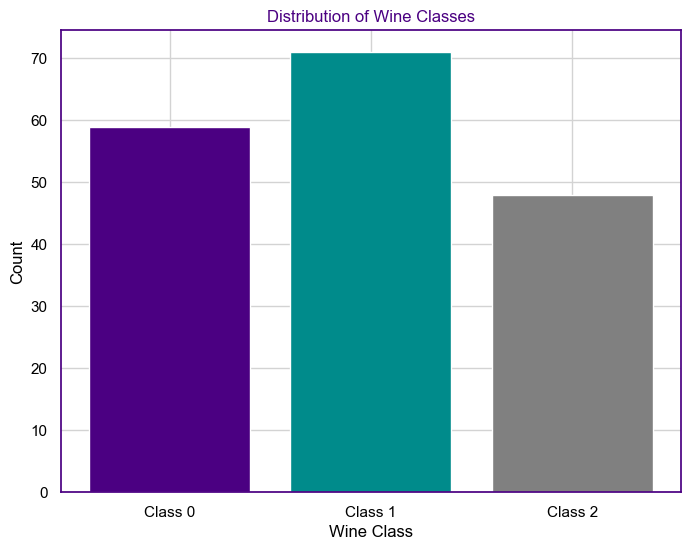

In [70]:
# Show how many samples there are for Class 0, Class 1, and Class 2
class_counts = wine['wine_class'].value_counts().sort_index()  # counts for 0,1,2

colors = ["#4B0082", "#008B8B", "gray"]  # Class 0, Class 1, Class 2

plt.figure(figsize=(8,6))
plt.bar(class_counts.index, class_counts.values, color=colors)
plt.title("Distribution of Wine Classes", color="#4B0082")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.xticks([0,1,2], ["Class 0", "Class 1", "Class 2"])
plt.show()

### Reflection 2:

**1. What patterns or anomalies do you notice?**  
- The scatter plots show that wines with higher alcohol content also tend to have higher color intensity and Proline levels.  
- The count plot shows that the dataset has slightly more samples in Class 1 compared to Class 0 or Class 2.  
- No major anomalies appear, and all classes have similar sample sizes.  

**2. Do any features stand out as potential predictors?**  
Yes. *Alcohol percentage*, *color intensity*, and *proline* appear to be strong predictors for wine classification. These variables visually separate the classes and likely contribute heavily to determining wine type.

**3. Are there any visible class imbalances?**  
Yes. There are slightly more samples in Class 0 than in Classes 1 or 2. While this imbalance isn’t severe, it could influence model performance if not addressed in future predictive modeling steps.


In [71]:
# Quick reference to mean, std, min, max
wine.describe().T[["mean", "std", "min", "max"]]

,mean,std,min,max
alcohol_pct,13.000618,0.811827,11.03,14.83
malic_acid,2.336348,1.117146,0.74,5.80
ash,2.366517,0.274344,1.36,3.23
ash_alcalinity,19.494944,3.339564,10.60,30.00
magnesium,99.741573,14.282484,70.00,162.00
total_phenols,2.295112,0.625851,0.98,3.88
flavonoids,2.029270,0.998859,0.34,5.08
nonflav_phenols,0.361854,0.124453,0.13,0.66
proanthocyanins,1.590899,0.572359,0.41,3.58
color_intensity,5.058090,2.318286,1.28,13.00


## Section 4: Feature Selection and Modeling

### 4.1 Choose Features and Target
For this classification task, the goal is to predict the **type of wine** (Class 0, 1, or 2) based on its chemical composition.

### Target Variable (y)
**`wine_class`** — indicates which wine type the sample belongs to (`0`, `1`, or `2`).

### Input Features (X)
- **`alcohol_pct`** wines with higher alcohol percentages often correspond to certain fermentation levels and class types.  
- **`color_intensity`** measures the visual depth of color, which varies strongly between classes.  
- **`proline`** an amino acid that differs with grape maturity and is a strong indicator of wine variety.  
- **`phenolic_ratio`** represents the ratio of color and flavor compounds, useful for distinguishing between similar wines.

### Justification
These features capture both **chemical** (`proline`, `phenolic_ratio`) and **visual** (`color_intensity`, `alcohol_pct`) aspects of wine. Together they provide meaningful information about the wine’s composition and appearance and both of which are essential for class prediction.

---

### 4.2 Define Features (X) and Target (y)
The selected input features and target variable are defined below.  
`X` contains the predictors, and `y` contains the class label we want to predict.

```python
X = wine[['alcohol_pct', 'color_intensity', 'proline', 'phenolic_ratio']]
y = wine['wine_class']


### Reflection 3:
1. **Why are these features selected?**  
   These features were selected because they represent key chemical and sensory properties that distinguish one wine type from another.  
   - **Alcohol percentage** helps identify differences in fermentation and wine strength.  
   - **Color intensity** captures how dark or rich the wine appears, which often varies by class.  
   - **Proline** reflects amino acid concentration, which can indicate grape maturity and sweetness.  
   - **Phenolic ratio** represents flavor and color balance, providing additional clues for classification.

2. **Are there any features that are likely to be highly predictive of class?**  
   Yes. **Color intensity** and **proline** are likely to be the most predictive features. Wines with higher color intensity and proline levels tend to group together within the same class which will show clear separation between different wine types.
   

## Section 5:  Splitting the Data
### This section compares two methods of splitting the dataset: 
1. A **basic random split** (Randomly splits 80% of the data into a training set and 20% into a test set.)
2. A **stratified split** to prepare for model training and evaluation.(Stratified sampling ensures that the proportion of each wine class (0, 1, 2) is preserved in both the training and test sets.This helps maintain balance and prevents bias during model evaluation.)
   

In [72]:
# Stratified split to preserve class balance
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    # Grab rows for X
    train_set = X.iloc[train_indices].copy()
    test_set = X.iloc[test_indices].copy()
    
    # Add the target column back in so we can inspect distribution like we did with Titanic
    train_set["wine_class"] = y.iloc[train_indices].values
    test_set["wine_class"] = y.iloc[test_indices].values

# Show sizes
print("Train size:", len(train_set))
print("Test size:", len(test_set))

# Compare class balance
print("\nOriginal Class Distribution:\n", y.value_counts(normalize=True))
print("\nTrain Set Class Distribution:\n", train_set["wine_class"].value_counts(normalize=True))
print("\nTest Set Class Distribution:\n", test_set["wine_class"].value_counts(normalize=True))

Train size: 142
Test size: 36

Original Class Distribution:
 wine_class
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

Train Set Class Distribution:
 wine_class
1    0.401408
0    0.330986
2    0.267606
Name: proportion, dtype: float64

Test Set Class Distribution:
 wine_class
1    0.388889
0    0.333333
2    0.277778
Name: proportion, dtype: float64


### Compare Results
Check the class distribution in the original, training, and test datasets to confirm how balanced each split is.


### Reflection 4:

1. **Why might stratification improve model performance?**  
   Stratification ensures that each class (0, 1, 2) is represented in the training and test sets in the same proportions as the full dataset. This prevents bias toward the most frequent class and allows the model to learn patterns from all wine types more evenly.

2. **How close are the training and test distributions to the original dataset?**  
   They are almost identical.  
   - Original:  Class 1 ≈ 0.399, Class 0 ≈ 0.331, Class 2 ≈ 0.270  
   - Train:     Class 1 ≈ 0.401, Class 0 ≈ 0.331, Class 2 ≈ 0.268  
   - Test:      Class 1 ≈ 0.389, Class 0 ≈ 0.333, Class 2 ≈ 0.278  
   This shows the stratified split maintained class balance very closely.

3. **Which split method produced better class balance?**  
   The **stratified split** clearly provided the best balance. A random split could have slightly over- or under-represented a class, but the stratified approach kept the proportions consistent across all sets.